In [1]:
pip install OpenCv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

Import the Modules and read the real and fake images using openCV.

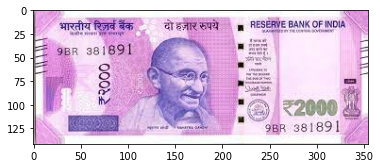

In [3]:
A = cv2.imread('real.jpg')
plt.imshow(A)

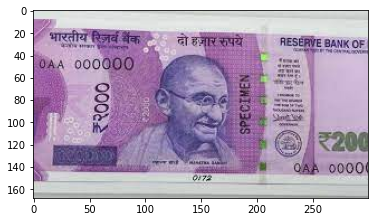

In [4]:
B = cv2.imread('fake2.jpg')
plt.imshow(B)

Here, we are converting the colored image into Black and White. Because it is easier to find important features of image when it is in black and white.

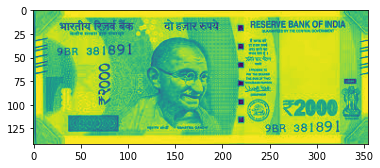

In [5]:
a = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)
plt.imshow(a)

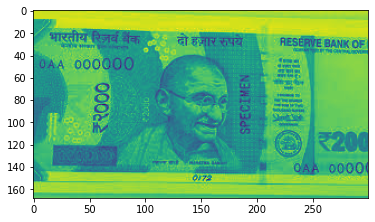

In [6]:
b = cv2.cvtColor(B, cv2.COLOR_BGR2GRAY)
plt.imshow(b)

Here, we are extracting the image of Gandhi Ji from the real note.

NOTE: every time you are extracting the image of Gandhi Ji, you need to adjust the coordinates.

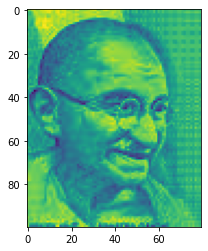

In [7]:
a_gandi = a[25:125,120:200]
plt.imshow(a_gandi)

 Here we are doing the same thing for fake note.

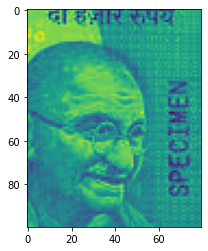

In [8]:
b_gandi = b[25:125, 120:200]
plt.imshow(b_gandi)

b_gandi = b[190:1250, 1090:2000]
plt.imshow(b_gandi)

Here we are extracting the thin strip from real note.

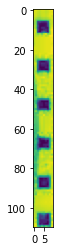

In [9]:
a_str = a[10:120,215:225]
plt.imshow(a_str)

 Here we are doing same thing for our fake note.

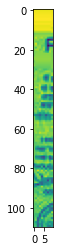

In [10]:
b_str = b[10:120,215:225]
plt.imshow(b_str)

The image is being converted into HSV here. It is just a different format. HSV (Hue Saturation Value) is also a numeric measurement of the color of your image. The measurement is in degrees. In RGB, hue refers to the angle at which the colors lie.

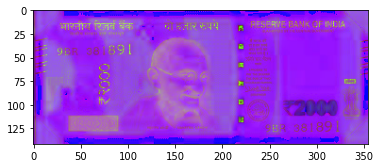

In [11]:
hsvReal = cv2.cvtColor(A, cv2.COLOR_BGR2HSV)
plt.imshow(hsvReal)

Here is the result.

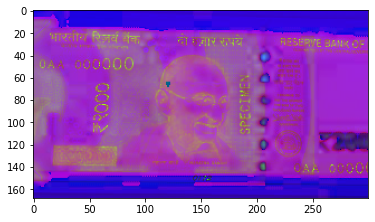

In [12]:
hsvFake = cv2.cvtColor(B, cv2.COLOR_BGR2HSV)
plt.imshow(hsvFake)

 Here we are extracting the thin strip from our hsv image.

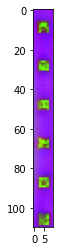

In [13]:
hsvReal_str= hsvReal[10:120,215:225]
plt.imshow(hsvReal_str)

 Here we are doing same thing for our fake image.

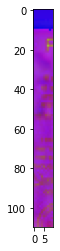

In [14]:
hsvFake_str = hsvFake[10:120,215:225]
plt.imshow(hsvFake_str)

In [15]:
def gstrip(img, min_size, connectivity=8):
    # Find all connected components (called here "labels")
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img, connectivity=connectivity)
    # check size of all connected components (area in pixels)
    for i in range(num_labels):
        label_size = stats[i, cv2.CC_STAT_AREA]   
        # remove connected components smaller than min_size
        if label_size < min_size:
            img[labels == i] = 0
    return img

 Here is the code for morphological extraction of the thin strip image.
 This is a very important step for extracting the number of lines in image.


In [16]:
binr = cv2.threshold(a_str, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
# define the kernel
kernel = np.ones((3, 3), np.uint8)
# invert the image
invert = cv2.bitwise_not(binr)
# use morph gradient
BWImageCloseReal = cv2.morphologyEx(invert, cv2.MORPH_GRADIENT, kernel)

Here we are doing the same thing for fake note.

In [17]:
binr2 = cv2.threshold(b_str, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
# define the kernel
kernel2 = np.ones((3, 3), np.uint8)
# invert the image
invert2 = cv2.bitwise_not(binr2)
# use morph gradient
BWImageCloseFake = cv2.morphologyEx(invert2, cv2.MORPH_GRADIENT, kernel2)

Here we are using our gstrip function for the thin strip.

In [18]:
areaopenReal = gstrip(BWImageCloseReal, 15);
areaopenFake = gstrip(BWImageCloseFake, 15);
print(areaopenReal)
print(areaopenFake)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0 255 ...   0 255 255]
 [  0   0 255 ... 255 255 255]
 [  0   0 255 ... 255 255 255]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [  0 255 255 ... 255 255 255]]


 Here is the code for the final counting of the number of lines in real note.

In [19]:
a_line = areaopenReal
labels = np.zeros(a_line.shape)
countReal = cv2.connectedComponentsWithStats(a_line, labels,8);
print(countReal)

(7, array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 6, ..., 0, 6, 6],
       [0, 0, 6, ..., 6, 6, 6],
       [0, 0, 6, ..., 6, 6, 6]], dtype=int32), array([[  0,   0,  10, 110, 800],
       [  1,   5,   8,   8,  48],
       [  1,  25,   8,   8,  47],
       [  1,  44,   8,   8,  50],
       [  1,  63,   8,   9,  51],
       [  1,  83,   8,   8,  50],
       [  1, 102,   9,   8,  54]], dtype=int32), array([[  4.45      ,  53.005     ],
       [  4.5       ,   8.5       ],
       [  4.65957447,  28.25531915],
       [  4.58      ,  47.48      ],
       [  4.19607843,  67.07843137],
       [  4.68      ,  86.4       ],
       [  5.14814815, 105.46296296]]))


Here is the code for the final counting of the number of lines in fake note.


In [20]:
b_line = areaopenFake
labels2 = np.zeros(b_line.shape)
countFake = cv2.connectedComponentsWithStats(b_line, labels2,8);
print(countFake)

(5, array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [0, 4, 4, ..., 4, 4, 4]], dtype=int32), array([[  0,   0,  10, 110, 534],
       [  5,  13,   5,  10,  44],
       [  0,  32,  10,  25, 172],
       [  0,  64,  10,  31, 252],
       [  0,  97,  10,  13,  98]], dtype=int32), array([[  3.64419476,  40.29962547],
       [  6.97727273,  17.36363636],
       [  5.70930233,  44.98255814],
       [  4.75396825,  78.3015873 ],
       [  5.2755102 , 104.05102041]]))


Here we are defining a correlation function. This correlation function will be used for our Gandhi Ji image. 
We just want to check the correlation between the photo of Gandhi Ji on the real and the fake one. 
This will take two 2d matrices as input and will give us the result in number form between 0 and 1. 
If the result is greater than 0.5, then Gandhi Ji photo on a fake note is legitimate otherwise not.

In [21]:
def correlation(A,B):
    A_mA = A - A.mean(1)[:, None]
    B_mB = B - B.mean(1)[:, None]
 
    # Sum of squares across rows
    ssA = (A_mA**2).sum(1)
    ssB = (B_mB**2).sum(1)
    # Finally get corr coeff
    return np.dot(A_mA, B_mB.T) / np.sqrt(np.dot(ssA[:, None],ssB[None]))

Here we are using our correlation function.
Also, we are writing our code to check if the correlation value is greater than 0.5 or not.
If it is greater than 0.5 then we are checking if the number of lines is equal or not.

In [22]:
corr=correlation(a_gandi,b_gandi)
if (corr.any()>=0.5):
    print ('correlevance of transparent gandhi > 0.5')
    print(int(corr.any()))
    if (countReal[0] == countFake[0] ):
        print ('currency is legitimate')
    else:
        print ('green strip is fake')
else:
    print ('correlevance of transparent gandhi < 0.5')
    print ('currency is fake')

correlevance of transparent gandhi > 0.5
1
green strip is fake


##### Summary
In this Machine Learning project, we built a fake currency detection system. We used grayscale conversion, segmentation, and feature extraction under image processing in our system to compare real and fake notes.
